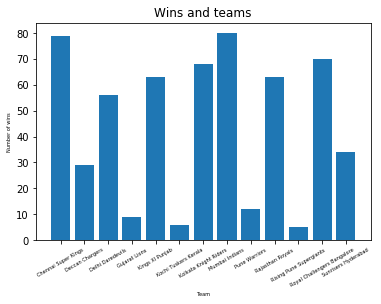

[('CH Gayle', 17), ('YK Pathan', 16), ('AB de Villiers', 15), ('DA Warner', 14), ('RG Sharma', 13), ('SK Raina', 13), ('AM Rahane', 12), ('G Gambhir', 12), ('MEK Hussey', 12), ('MS Dhoni', 12), ('V Kohli', 11), ('V Sehwag', 11), ('DR Smith', 10), ('JH Kallis', 10), ('SR Watson', 10), ('A Mishra', 9), ('SE Marsh', 9), ('KA Pollard', 8), ('SR Tendulkar', 8), ('AC Gilchrist', 7), ('RA Jadeja', 7), ('A Nehra', 6), ('AD Russell', 6), ('AT Rayudu', 6), ('BJ Hodge', 6), ('Harbhajan Singh', 6), ('M Vijay', 6), ('UT Yadav', 6), ('AJ Finch', 5), ('BB McCullum', 5), ('DPMD Jayawardene', 5), ('DW Steyn', 5), ('JP Faulkner', 5), ('KC Sangakkara', 5), ('RV Uthappa', 5), ('SC Ganguly', 5), ('SL Malinga', 5), ('B Kumar', 4), ('GJ Maxwell', 4), ('JP Duminy', 4), ('KD Karthik', 4), ('MK Pandey', 4), ('ML Hayden', 4), ('PA Patel', 4), ('SK Warne', 4), ('SP Narine', 4), ('Yuvraj Singh', 4), ('A Kumble', 3), ('A Symonds', 3), ('AR Patel', 3), ('DA Miller', 3), ('KP Pietersen', 3), ('L Balaji', 3), ('LRPL T

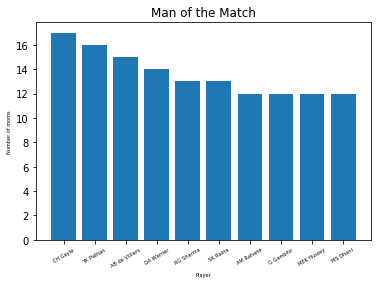

In [1]:
#visualization1
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, date
import numpy as np
def sortbyval(a):
    return a[1]
def plotwins(g,f): #plots a bar graph of batsmen and number of wins
    plt.bar(range(len(g)),f)
    plt.xlabel('Team', fontsize=5)
    plt.ylabel('Number of wins', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Wins and teams')
    plt.show()
def plotmom(g,f): #plots a bar graph of batsmen and number of runs
    plt.bar(range(len(g)),f)
    plt.xlabel('Player', fontsize=5)
    plt.ylabel('Number of moms', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Man of the Match')
    plt.show()
%matplotlib inline
matches = pd.read_csv("./../../Data/matches.csv")
dels = pd.read_csv("./../../Data/deliveries.csv")
#dels.head()                   
matches.head()
a=matches.groupby(matches['winner'])['id'].count().reset_index(name='wins')
plotwins(list(a['winner']),list(a['wins']))
b=matches.groupby(matches['player_of_match'])['id'].count().reset_index(name='mom')
c=list(zip(b['player_of_match'],b['mom']))
c=sorted(c,key=sortbyval,reverse=True)
print(c)
d=[x[0] for x in c]
e=[x[1] for x in c]
plotmom(d[0:10],e[0:10])
score=dels.groupby([dels['match_id'],dels['inning'],dels['batting_team']])['total_runs'].sum().reset_index(name='Score')
score1=score.groupby([score['batting_team'],score['inning']])['Score'].sum().reset_index(name='score1')


['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


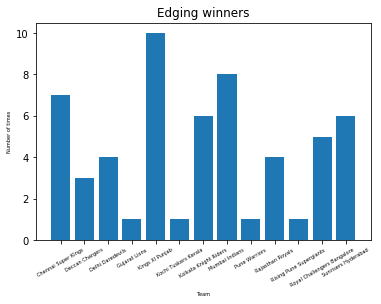

In [15]:
#visualization2

b = matches[((matches['win_by_runs']<10) & (matches['win_by_runs']>0)) 
                                  | ((matches['win_by_wickets']<=2) & (matches['win_by_wickets']>0))]
a=b.groupby(['team1'])['id'].count().reset_index(name='Number')


def plotcm(g,f): #plots a bar graph of batsmen and number of close wins
    plt.bar(range(len(g)),f)
    plt.xlabel('Team', fontsize=5)
    plt.ylabel('Number of times', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Edging winners')
    plt.savefig("edging_winner")

plotcm(list(a['team1']),list(a['Number']))#plots teams and the number of times they have won closely
print(list(a['team1']))

[('SK Raina', 4548), ('V Kohli', 4423), ('RG Sharma', 4207), ('G Gambhir', 4132), ('DA Warner', 4014), ('RV Uthappa', 3778), ('CH Gayle', 3651), ('S Dhawan', 3561), ('MS Dhoni', 3560), ('AB de Villiers', 3486)]


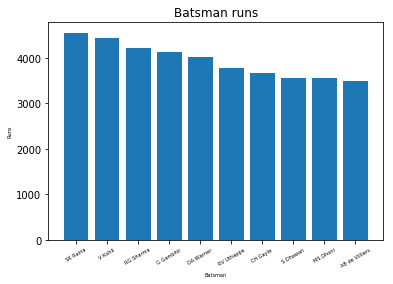

In [43]:
#visualization 3
#It contains most best batsmen and the runs they showed
import time
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt




df=pd.read_csv("./../../Data/a.csv",low_memory=False)
columns=[]
ipl=df.drop(columns=['ball','innings','delivery','team','non_striker','extra_run','wicket_kind','player_out'])
ipl=ipl[['bowler','batsman','runs']].groupby(['batsman'])['runs'].sum().reset_index(name='batsman_run')
a=list(ipl['batsman'])
b=list(ipl['batsman_run'])
c=list(zip(a,b))
def sortbyval(a): # sorts the list by number of runs
    return a[1]
def bestbats(d): #finds top 20 batsman who have scored most number of runs
    bat=list()
    for i in d[0:10]:
        bat.append(i)
    return bat
def ext(e): # returns a list of runs scored by top 20 batsmen
    k=list()
    s=list()
    l=list()
    for i in e:
        for j in i:
               if(type(j) is str):
                    s.append(j)
               else :
                    k.append(j)
            
    
    return k
def ext1(e): #returns a list of top 20 batsman names
    k=list()
    s=list()
    l=list()
    for i in e:
        for j in i:
               if(type(j) is str):
                    s.append(j)
               else :
                    k.append(j)
            
    
    return s
def plotbestbat(g,f): #plots a bar graph of batsmen and number of runs
    plt.bar(range(len(g)),f)
    plt.xlabel('Batsman', fontsize=5)
    plt.ylabel('Runs', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Batsman runs')
    plt.show()
d=sorted(c,key=sortbyval,reverse=True)
e=bestbats(d)
f=ext(e)
g=ext1(e)
print(e)
plotbestbat(g,f)


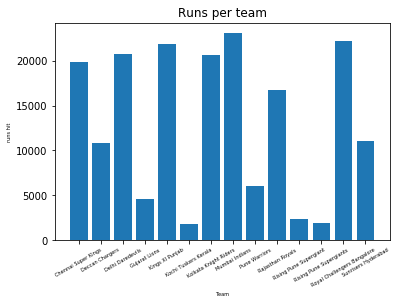

                           team    tot
0           Chennai Super Kings  19822
1               Deccan Chargers  10885
2              Delhi Daredevils  20772
3                 Gujarat Lions   4629
4               Kings XI Punjab  21827
5          Kochi Tuskers Kerala   1758
6         Kolkata Knight Riders  20660
7                Mumbai Indians  23108
8                 Pune Warriors   6040
9              Rajasthan Royals  16784
10       Rising Pune Supergiant   2370
11      Rising Pune Supergiants   1962
12  Royal Challengers Bangalore  22244
13          Sunrisers Hyderabad  11068
                           team   wk
0           Chennai Super Kings  688
1               Deccan Chargers  484
2              Delhi Daredevils  877
3                 Gujarat Lions  188
4               Kings XI Punjab  915
5          Kochi Tuskers Kerala   86
6         Kolkata Knight Riders  830
7                Mumbai Indians  936
8                 Pune Warriors  298
9              Rajasthan Royals  690
10      

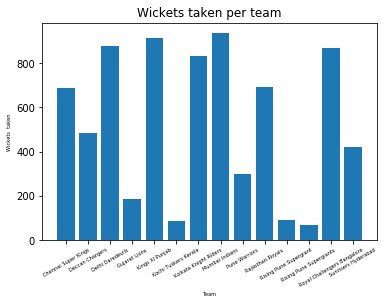

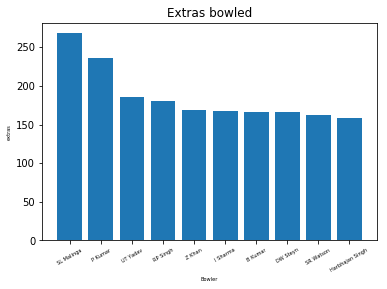

Extras  [('SL Malinga', 268), ('P Kumar', 236), ('UT Yadav', 186), ('RP Singh', 181), ('Z Khan', 169), ('I Sharma', 167), ('B Kumar', 166), ('DW Steyn', 166), ('SR Watson', 162), ('Harbhajan Singh', 158), ('DJ Bravo', 157), ('JA Morkel', 153), ('R Ashwin', 143), ('IK Pathan', 142), ('PP Ojha', 138), ('L Balaji', 131), ('M Morkel', 131), ('DS Kulkarni', 127), ('JH Kallis', 126), ('M Muralitharan', 123), ('PP Chawla', 117), ('AB Dinda', 116), ('A Nehra', 115), ('A Mishra', 114), ('R Vinay Kumar', 114), ('SW Tait', 111), ('S Sreesanth', 109), ('JP Faulkner', 105), ('SK Trivedi', 104), ('VR Aaron', 99), ('MG Johnson', 98), ('KA Pollard', 97), ('RJ Harris', 87), ('SP Narine', 86), ('B Lee', 84), ('Sandeep Sharma', 84), ('MJ McClenaghan', 83), ('RA Jadeja', 83), ('DP Nannes', 81), ('PJ Sangwan', 81), ('WD Parnell', 80), ('CH Morris', 77), ('M Kartik', 77), ('Mohammed Shami', 76), ('CH Gayle', 75), ('R Bhatia', 73), ('AR Patel', 71), ('YK Pathan', 71), ('JJ Bumrah', 69), ('MA Starc', 69), ('Y

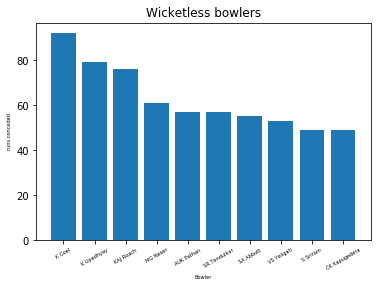

In [46]:
#visualization4
import time
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
def sortbyval(a):
    return a[1]
def outs(a):
    if a['wicket_kind'] is "runout":
        del a['wicket_kind']
        print("hi")
    return a

    
    
    
    
def ct(a):
    for i in a[2]:
        count=count+1
    return count
def plotrunsteam(g,f): #plots a bar graph of batsmen and number of runs
    plt.bar(range(len(g)),f)
    plt.xlabel('Team', fontsize=5)
    plt.ylabel('runs hit', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Runs per team')
    plt.show()
def plotwckt(g,f): #plots a bar graph of batsmen and number of runs
    plt.bar(range(len(g)),f)
    plt.xlabel('Team', fontsize=5)
    plt.ylabel('Wickets  taken', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Wickets taken per team')
    plt.show()
def plotwck(g,f): #plots a bar graph of batsmen and number of runs
    plt.bar(range(len(g)),f)
    plt.xlabel('Bowler', fontsize=5)
    plt.ylabel('runs conceded', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Wicketless bowlers')
    plt.show()
def plotextra(g,f): #plots a bar graph of batsmen and number of runs
    plt.bar(range(len(g)),f)
    plt.xlabel('Bowler', fontsize=5)
    plt.ylabel('extras', fontsize=5)
    plt.xticks(range(len(g)),g, fontsize=5, rotation=30)
    plt.title('Extras bowled')
    plt.show()
        
df=pd.read_csv("./../../Data/a.csv",low_memory=False)
df.replace('run out',np.nan)
columns=[]
ipl=df.drop(columns=['innings','delivery','non_striker'])
ipl1=ipl[['bowler','batsman','runs','team']].groupby(['team'])['runs'].sum().reset_index(name='tot')
i1=list(ipl1['team'])
l2=list(ipl1['tot'])
plotrunsteam(i1,l2)
print(ipl1)
ipl2=ipl[['bowler','wicket_kind','team','player_out']].groupby(['bowler','player_out','team'])['wicket_kind'].size().reset_index(name='wic')
ipl3=ipl2[['bowler','player_out','team','wic']].groupby(['bowler','team'])['wic'].sum().reset_index(name='wickets')
iplx=ipl3[['bowler','team','wickets']].groupby(['team'])['wickets'].sum().reset_index(name='wk')
print(iplx)
i3=list(iplx['team'])
i4=list(iplx['wk'])
plotwckt(i3,i4)
ipl4=ipl[['bowler','player_out','runs']].groupby(['bowler'])['runs'].sum().reset_index(name='cruns')
ipl5=ipl[['bowler','ball']].groupby(['bowler'])['ball'].size().reset_index(name="balls")
ipl6=ipl[['batsman','bowler','extra_run']].groupby(['bowler','batsman'])['extra_run'].sum().reset_index(name='xr')
ipl7=ipl6[['bowler','xr']].groupby(['bowler'])['xr'].sum().reset_index(name="Extras")
bw=list(ipl7['bowler'])
xr=list(ipl7['Extras'])
br=list(zip(bw,xr))
br=sorted(br,key=sortbyval,reverse=True)
br1=[x[0] for x in br]
br2=[x[1] for x in br]
plotextra(br1[0:10],br2[0:10])
print("Extras ",br)# bowlers and extras bowled

a=ipl3['bowler']
b=ipl3['wickets']
c=list(zip(a,b))
d=sorted(c,key=sortbyval,reverse=True)

e=ipl4['bowler']
d1=ipl4['cruns']

f=dict(zip(a,b))
g=dict(zip(e,d1))
h=g.keys()-f.keys()
l=list()
for i in h:
    l.append((i,g[i]))
    del g[i]
#print(len(f),len(g))
wu=list(f.values())#list of wickets
ru=list(g.values())#list of runs
na=list(g.keys())

avg=[b/a for a,b in zip(wu,ru)]
la=list(zip(na,avg))#prints list of bowlers and their averages
print("wicketless bowlers are",l)
l=sorted(l,key=sortbyval,reverse=True)
l1=[x[0] for x in l]
l2=[x[1] for x in l]
plotwck(l1[0:10],l2[0:10])#prints a list of bowlers who have never taken a wicket

    

